## Libraries

In [1]:
library('ggplot2')
library('gridExtra')
library('RColorBrewer')
library(grid)
library(reshape2)
library('ggExtra')

In [2]:
setwd("../")

## Functions

### my_scatter_plot

In [3]:
my_scatter_plot <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE, myxlab="x values", myylab="y values"){
    df <- data.frame(x=x, y=y)
    if (quantile){
        myylim=quantile(df$y, c(0.001, .999), na.rm=T)
        myxlim=quantile(df$x, c(0.001, .999), na.rm=T)
    }
    p=cor.test(df$x, df$y)
    if (p$p.value == 0){
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="") #, "\n p-value < 2.2e-16", sep="")
    } else {
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")} # "\n p-value: ", round(p$p.value, digits=4), sep="")}
    # ggMarginal is being weird with using scale_x_continuous, so need to filter the data with the x and y limits 
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]
    p1 <- ggplot(df[myi,], aes(x,y)) + geom_point(size=.1, alpha=0.1) + 
        xlab(paste0(myxlab, "\n\n")) + ylab(paste0("\n\n", myylab)) +
        annotate("text", x=-Inf, y=Inf, label=mytext, vjust=1.1, hjust=0, size=3) + 
        theme(axis.text=element_text(size=8), text=element_text(size=9), 
              plot.title=element_text(size=1))
        #stat_density2d(aes(fill=..level..), geom="polygon")+ scale_fill_gradient(low="blue", high="orange")
    pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(pf)
}

my_scatter_densplot <- function(x, y, d, myxlim=NULL, myylim=NULL, quantile=FALSE, 
                                myxlab="x values", myylab="y values", mydlab="dens") {
    df <- data.frame(x=x, y=y, d_score=d)
    if (quantile){
        myylim=quantile(df$y, c(0.001, .999))
        myxlim=quantile(df$x, c(0.001, .999))
    }
    p=cor.test(df$x, df$y)
    if (p$p.value == 0){
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")} #, "\n p-value < 2.2e-16", sep="")
    else {
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")} # "\n p-value: ", round(p$p.value, digits=4), sep="")}
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]

    p1 <- ggplot(df) + geom_point(aes(x=x, y=y, col=d_score), size=0.6, alpha=0.7) + 
        xlim(myxlim) + ylim(myylim) + scale_colour_gradient2() +
        labs(x=myxlab, y=myylab, colour=mydlab)
        #guides(fill=guide_legend(override.aes=list(size=3))) 
    #pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(p1)
}

In [4]:
make_into_stars<-function(x){
    s=""
    if (x <= 0.05){s="*"}
    if (x <= 0.01){s="**"}
    if (x <= 0.001){s="***"}
    if (x <= 0.0001){s="****"}
    return(s)
}

# UMI per timepoints

In [5]:
mytimes=c("_1min", "_5min", "_10min", "_15min", "_30min", "_on")

In [5]:
getwd()

[1] "/Users/tballing/Documents/Research/GPSeq"

## BICRO58 (Hap1)

In [16]:
dat <- read.table("data/BICRO58_all_umiCount.txt", header=T)

myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
datc <- dat[,myord]

datc[datc==-1]=0

In [7]:
totumis <- apply(datc, 2, sum)
totumis

TK99_1min  TK100_5min TK101_10min TK102_15min TK103_30min    TK104_on 
     342569      743976     2553632     5406052     2743576     6637521

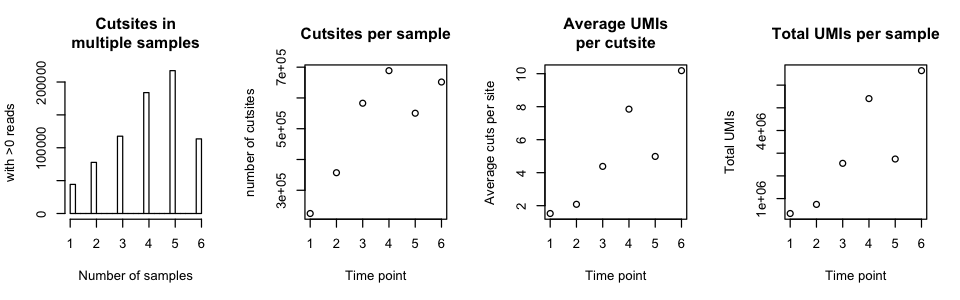

In [11]:
datcnt <- apply(datc, 1, function(x) sum(x > 0))
options(repr.plot.width=8, repr.plot.height=2.5)
par(mfrow=c(1,4))
hist(datcnt, xlab="Number of samples", ylab="Number of cutsites\nwith >0 reads", main="Cutsites in\nmultiple samples")
xcnt <- apply(datc, 2, function(x) sum(x>0))
plot(xcnt, xlab="Time point", ylab="number of cutsites", main="Cutsites per sample")
x <- apply(datc, 2, function(x) mean(x[x>0]))
plot(x, xlab="Time point", ylab="Average cuts per site", main="Average UMIs\nper cutsite")
plot(totumis, xlab="Time point", ylab="Total UMIs", main="Total UMIs per sample")

## BICRO62 (IMR90)

In [13]:
dat <- read.table("data/BICRO62_all_umiCount.txt", header=T)

myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
datc <- dat[,myord]

datc[datc==-1]=0

In [14]:
totumis <- apply(datc, 2, sum)
totumis

TK111_1min  TK112_5min TK113_10min TK114_15min TK115_30min    TK116_on 
    1654967     5192602    23383500    37733544    19765715    38328589

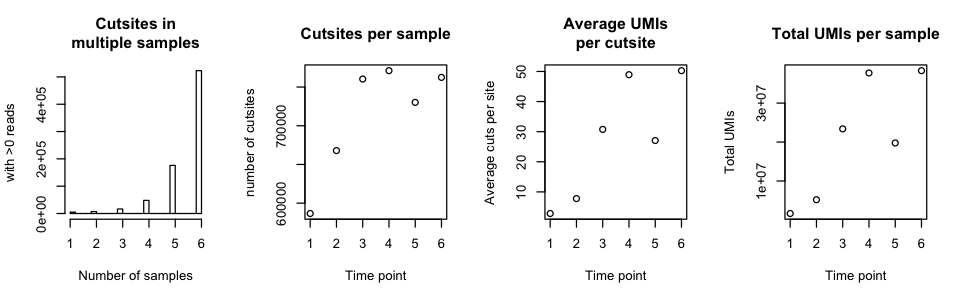

In [15]:
datcnt <- apply(datc, 1, function(x) sum(x > 0))
options(repr.plot.width=8, repr.plot.height=2.5)
par(mfrow=c(1,4))
hist(datcnt, xlab="Number of samples", ylab="Number of cutsites\nwith >0 reads", main="Cutsites in\nmultiple samples")
xcnt <- apply(datc, 2, function(x) sum(x>0))
plot(xcnt, xlab="Time point", ylab="number of cutsites", main="Cutsites per sample")
x <- apply(datc, 2, function(x) mean(x[x>0]))
plot(x, xlab="Time point", ylab="Average cuts per site", main="Average UMIs\nper cutsite")
plot(totumis, xlab="Time point", ylab="Total UMIs", main="Total UMIs per sample")

## Conclusions
- The IMR90 experiment has better coverage between these two datasets.  
- It is curious that the 30min timepoint (timepoint 5) has fewer reads than the earlier timepoints for both experiments.
- As digestion time increases, both the number of sites being cut and the number of cuts per site increase, which means that we are not simply seeing an increase in cleavage frequency for a limited number of accessible sites across time points.  
- Q: What happens when you increase the concentration of the enzyme while maintaining the same digestion time?  Ie- if you do an over night digestion with different enzyme concentrations, would you expect to see the same pattern as when you do the time course?  

# Histograms of UMI

In [17]:
make_hist_data <- function(mydat, mymax) {
    mydens <- c()
    mycnts <- c()
    for (i in seq(1,ncol(mydat))){
        myi <- mydat[,i] < mymax & mydat[,i] > (-1*mymax)
        myh <- hist(mydat[myi,i], breaks=seq(-1 * mymax, mymax, by=mymax/30), plot=F)
        if (length(mycnts)==0){
            mymids <- myh$mids
            mycnts <- myh$counts
            mydens <- myh$density 
        }
        else {
            mycnts <- cbind(mycnts, myh$counts)
            mydens <- cbind(mydens, myh$density)
        }
    }
    mydens <- cbind(mymids, mydens)
    colnames(mydens) = c("mids", labels(mydat)[[2]])
    mycnts <- cbind(mymids, mycnts)
    colnames(mycnts) = c("mids", labels(mydat)[[2]])
    return(list(mydens, mycnts))
}

In [19]:
mytimes=c("_1min", "_5min", "_10min", "_15min", "_30min", "_on")

## BICRO58

In [20]:
dat <- read.table("data/BICRO58_all_umiCount.txt", header=T)
myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
datc <- dat[,myord]
datc[datc==-1]=0
colnames(datc) <- mytimes

In [21]:
# normalize by the total number of UMIs per timepoint
datn <- datc
for (i in seq(1,ncol(datc))){
    tot=sum(datc[,i])
    datn[,i]=datc[,i]/tot
}
datn <- datn *1000000

In [27]:
mymax=600
hdat <- make_hist_data(datc, mymax)
mydens = hdat[[1]]
mycnts = hdat[[2]]
dfm <- melt(data.frame(mycnts), id="mids")
pc <- ggplot(dfm, aes(colour=variable, y=value, x=mids)) + geom_line() + 
    xlim(0, mymax)  +  labs(y="Number of cutsites", x="Number of UMI", title="Histogram: number of cutsites\nper UMI counts") + scale_y_log10()

In [28]:
mymax=50
hdat <- make_hist_data(datn, mymax)
mydens = hdat[[1]]
mycnts = hdat[[2]]
dfm <- melt(data.frame(mycnts), id="mids")
pn <- ggplot(dfm, aes(colour=variable, y=value, x=mids)) + geom_line() + 
    xlim(0, mymax)  +  labs(y="Number of cutsites", x="Fraction of UMI", title="Histogram: number of cutsites\nper relative UMI counts") + scale_y_log10()

### plots

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 180 rows containing missing values (geom_path).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 180 rows containing missing values (geom_path).”

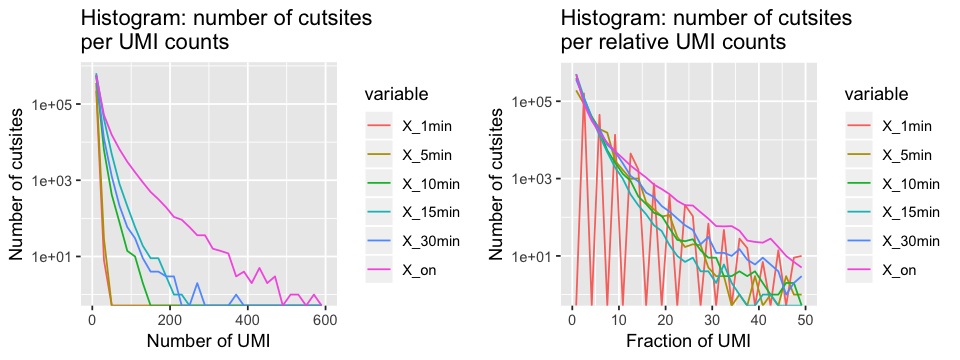

In [29]:
options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(pc, pn, ncol=2)

We see, as is also shown in the plots in section 1, that the number of UMI per cutsite increases with increased digestion time, although the 15 and 30 minute timepoints seem out of order. When we normalize by the total number of UMIs (reads) per experiment, the timepoint are less distinguishable.  Ie- the relative fraction of UMI across cutsites doesn't change much.  At each UMI "peak" level the peak increases relative to the total number of UMIs.  

# Correlation across time
Want to see how much individual cutsites correlate across time points.  At a glance of the data in the IGV viewer, the timepoints have very similar profiles. 

In [33]:
# Read in the data
dat <- read.table("data/BICRO62_all_umiCount.txt", header=T)
dat[dat==-1]=0

mytimes=c("_1min", "_5min", "_10min", "_15min", "_30min", "_on")
myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
datc <- dat[,myord]

mycors=c()
myt1s=c()
myt2s=c()
for (i in seq(1,(length(mytimes)-1))){
    for (j in seq((i+1),length(mytimes))){
        mycor <- cor(datc[,i], datc[,j])
        mycors <- c(mycors, mycor)
        myt1s <- c(myt1s, mytimes[i])
        myt2s <- c(myt2s, mytimes[j])
    }
}

df <- data.frame(correlation=as.numeric(mycors), t1=factor(myt1s, levels=mytimes), t2=factor(myt2s, levels=mytimes))
p62 <- ggplot(df, aes(y=correlation, x=t1, colour=t2)) + geom_point() + 
    labs(y="Pearson's correlation", title="IMR90")

In [40]:
# Read in the data
dat <- read.table("data/BICRO58_all_umiCount.txt", header=T)
dat[dat==-1]=0

mytimes=c("_1min", "_5min", "_10min", "_15min", "_30min", "_on")
myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
datc <- dat[,myord]

mycors=c()
myt1s=c()
myt2s=c()
for (i in seq(1,(length(mytimes)-1))){
    for (j in seq((i+1),length(mytimes))){
        mycor <- cor(datc[,i], datc[,j])
        mycors <- c(mycors, mycor)
        myt1s <- c(myt1s, mytimes[i])
        myt2s <- c(myt2s, mytimes[j])
    }
}

df <- data.frame(correlation=as.numeric(mycors), t1=factor(myt1s, levels=mytimes), t2=factor(myt2s, levels=mytimes))
p58 <- ggplot(df, aes(y=correlation, x=t1, colour=t2)) + geom_point() + 
    labs(y="Pearson's correlation", title="HAP1")

### plots

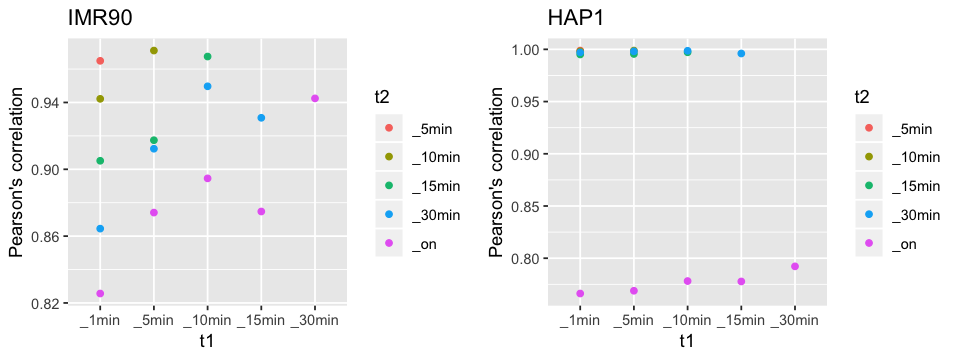

In [41]:
options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(p62, p58, ncol=2)

Each point represents the Pearson's correlation between all of the cutsites at t1 with the cutsites at t2.  For example, at 15min, the correlation between 15min and 30min is in blue and between 15min and on is in pink. (This is essentially a correlation matrix in scatter plot form).  In both cell types, we see higher correlation between "closer" time points than "further" ones (see zoomed in plot of HAP1, below).  There is a larger difference between the ON timepoint in HAP1 than in IMR90.  

Warning message:
“Removed 5 rows containing missing values (geom_point).”

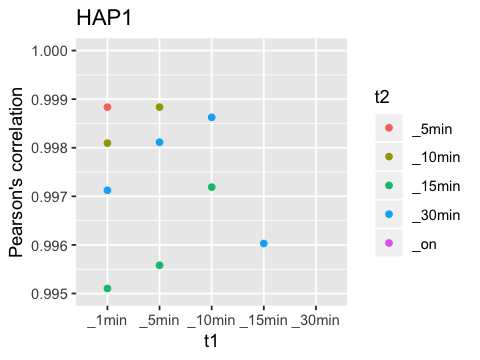

In [46]:
options(repr.plot.width=4, repr.plot.height=3)
p2 <- p58 + ylim(0.995,1)
grid.arrange(p2)

# Correlation between neighboring cutsites
Want to see how much UMI count varies between neighboring cutsites.  Do regions that are near each other have similar centrality profiles?  How far apart do cutsites need to be before they don't correlate? 

In [64]:
make_dist_matrix <- function(dat, tm=1){
    chrs=rle(as.character(dat$chr))$values
    dmat=c()
    for (chr in chrs){
        chrdat <- dat[dat$chr==chr,]
        dist <- chrdat$start[2:nrow(chrdat)] - chrdat$end[1:(nrow(chrdat)-1)]
        cid1 <- chrdat$cs_id[2:nrow(chrdat)]
        cid2 <- chrdat$cs_id[1:(nrow(chrdat)-1)]
        c1 <- chrdat[2:nrow(chrdat),tm+4]
        c2 <- chrdat[1:(nrow(chrdat)-1),tm+4]
        distm <- cbind(cid1, cid2, c1, c2, dist)
        dmat <- rbind(dmat, distm)
    }
    colnames(dmat) <- c("cutsite1", "cutsite2", "c1", "c2", "dist")
    return(dmat)
}

get_correlation_per_distance <- function(dat, distances){
    mycors <- c()
    for (d in distances){
        ddat <- dat[dat[,5] < d,]
        mycor <- cor(ddat[,3], ddat[,4])
        mycors <- c(mycors, mycor)
    }
return(mycors)
}

In [65]:
dat <- read.table("data/BICRO62_all_umiCount.txt", header=T)
dat[dat==-1]=0

mytimes=c("_1min", "_5min", "_10min", "_15min", "_30min", "_on")
myord=c()
for (i in seq(1,length(mytimes))){
    j=grep(mytimes[i], labels(dat)[[2]])
    myord=c(myord, j)
}
dat <- dat[,c(1:4,myord)]

In [66]:
## Correlation per distance
distances <- c(10, 100, 1000, 5000, 1e4, 1e5, 5e5, 1e6)
mydc <- distances
for (ti in seq(1,length(mytimes))){
    dmat <- make_dist_matrix(dat, ti)
    mycors <- get_correlation_per_distance(dmat, distances)
    mydc <- cbind(mydc, mycors)
}
colnames(mydc) <- c("distance", mytimes)

In [ ]:
dfm <- melt(data.frame(mydc), id="distance")
p <- ggplot(dfm, aes(x=distance, y=value, colour=variable)) + geom_line() + 
    scale_x_log10() + 
    labs(x="Distance between cutsites (bp)", y="Pearson's Correlation") + 
    ggtitle("Correlation between\nneighboring cutsites")

### plot

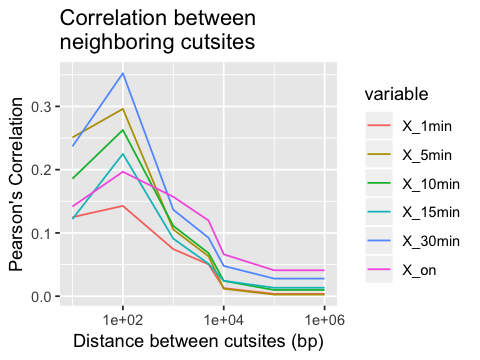

In [68]:
options(repr.plot.width=4, repr.plot.height=3)
grid.arrange(p)

For each timepoint, the correlation in UMI count between neighboring cutsites is shown across the genome.  This shows that UMI counts correlate more strongly when they are closer together, but once we get further than ~1kb apart, they don't correlate.  This is interesting because the average distance between cutsites is about 4kb.  Even near neighbors only have 0.35 correlation at the most, which seems low.  While the 30min timepoint has the highest correlation, which may mean it is less noisy, and the 1min timepoint has the lowest, indicating it is more noisy, the timpoints in between are not in matching order. 